In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Breast_Cancer.csv")
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
df.shape

(683, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           683 non-null    int64
 1   Clump Thickness              683 non-null    int64
 2   Uniformity of Cell Size      683 non-null    int64
 3   Uniformity of Cell Shape     683 non-null    int64
 4   Marginal Adhesion            683 non-null    int64
 5   Single Epithelial Cell Size  683 non-null    int64
 6   Bare Nuclei                  683 non-null    int64
 7   Bland Chromatin              683 non-null    int64
 8   Normal Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB


In [5]:
df.isnull().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [6]:
df.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [7]:
# feature and target
X = df.iloc[:,1:-1]
y = df.iloc[:,-1]

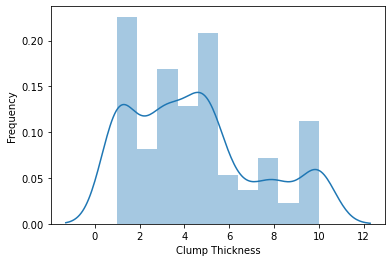

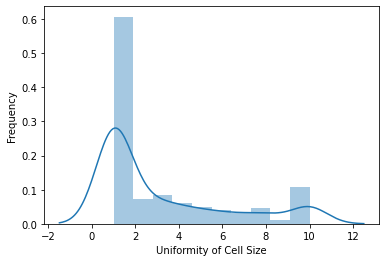

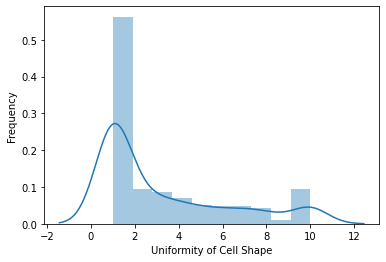

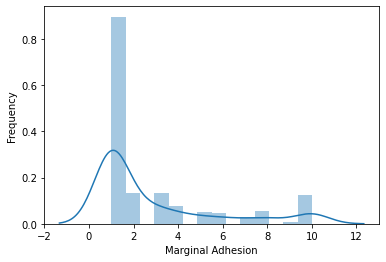

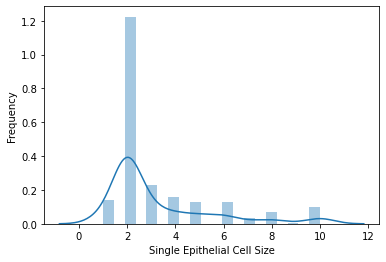

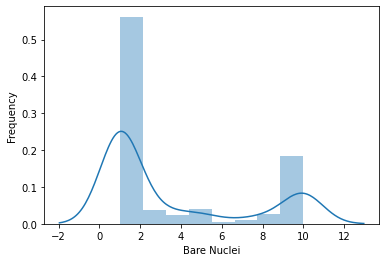

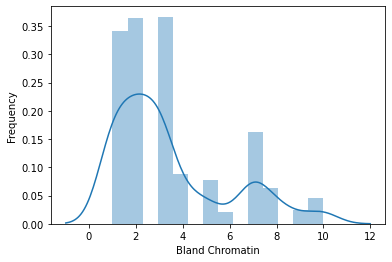

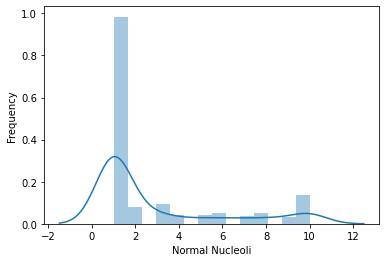

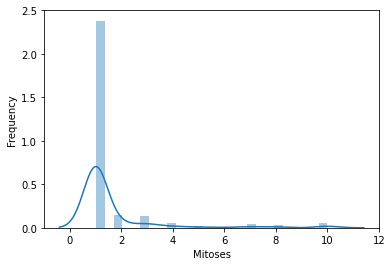

In [27]:
for col in X:
    plt.figure()
    sns.distplot(X[col])
    plt.ylabel("Frequency")
    plt.show()

from above distplot we can see that "Uniformity of Cell Size" , "Uniformity of Cell Shape" , "Marginal Adhesion" , "Single Epithelial Cell Size" , "Bare Nuclei" , "Bland Chromatin" , "Normal Nucleoli" , "Mitoses" has right skewness

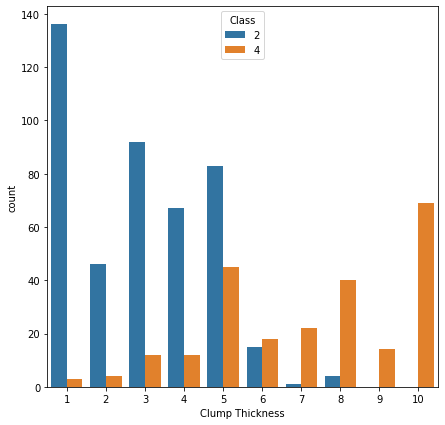

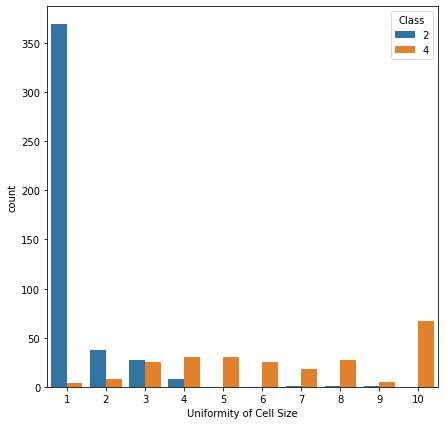

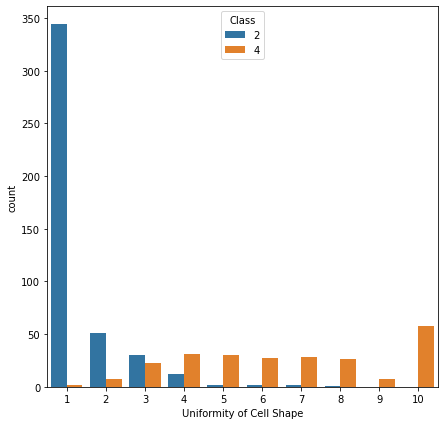

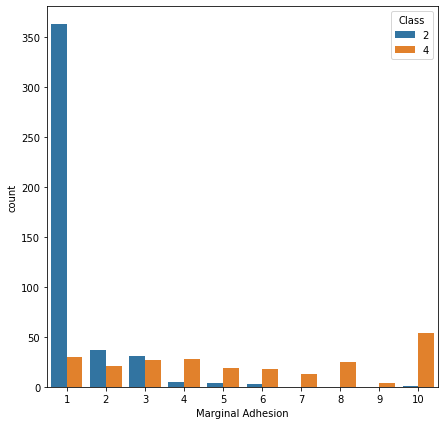

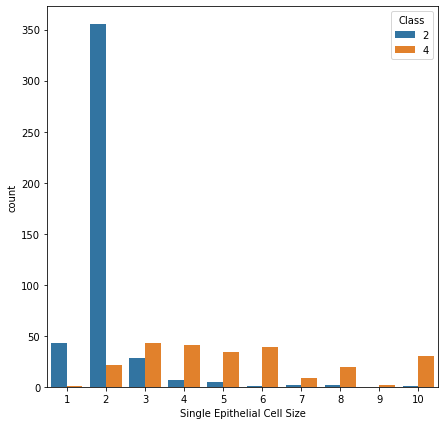

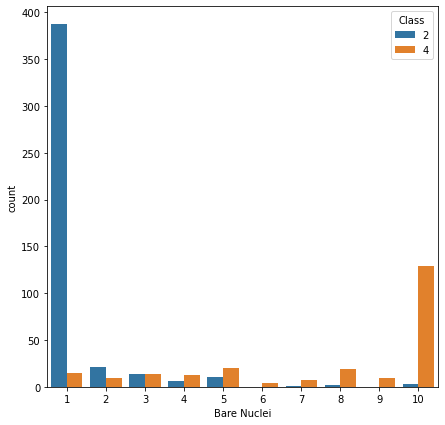

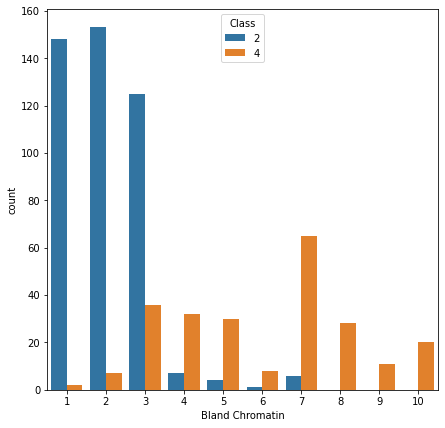

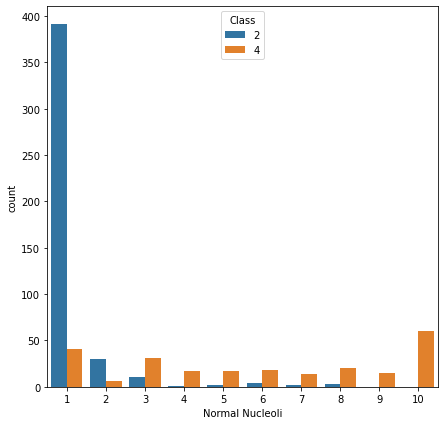

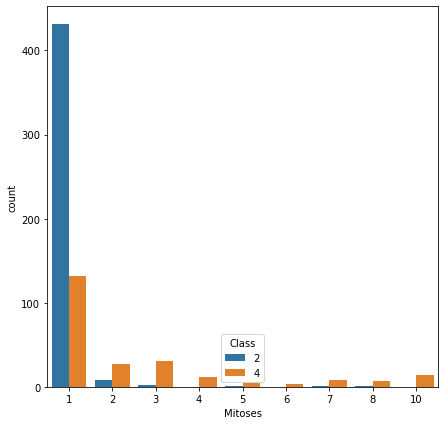

In [14]:
for col in X:
    plt.figure(figsize= (7,7))
    sns.countplot(data=df, x=col, hue=y)
    plt.show()

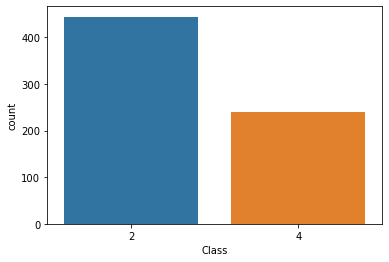

In [15]:
# target count
plt.figure()
sns.countplot(y)
plt.show()

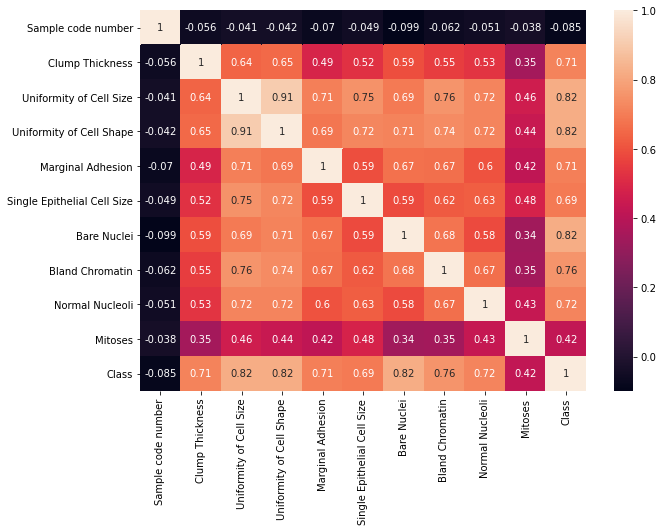

In [19]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [21]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:
# model
# gini index
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [24]:
# train score
model.score(X_train,y_train)

1.0

In [25]:
# predict
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           2       0.96      0.97      0.97       133
           4       0.94      0.93      0.94        72

    accuracy                           0.96       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.96      0.96      0.96       205



In [28]:
# depth
model.get_depth()

8

In [38]:
# prunning
# max depth

model3 = DecisionTreeClassifier(max_depth=6)
model3.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [39]:
y_train.value_counts()

2    311
4    167
Name: Class, dtype: int64

In [40]:
# predict
y_pred = model3.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           2       0.96      0.96      0.96       133
           4       0.93      0.93      0.93        72

    accuracy                           0.95       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.95      0.95      0.95       205



In [45]:
# min samples leaf
model4 = DecisionTreeClassifier(min_samples_leaf=10)
model4.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_leaf=10)

In [46]:
# predict
y_pred = model3.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           2       0.96      0.96      0.96       133
           4       0.93      0.93      0.93        72

    accuracy                           0.95       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.95      0.95      0.95       205



In [48]:
# oversampling 
from imblearn.over_sampling import RandomOverSampler

In [49]:
rs = RandomOverSampler(random_state=1)
X_train_rs, y_train_rs = rs.fit_resample(X_train,y_train)

In [50]:
y_train_rs.value_counts()

2    311
4    311
Name: Class, dtype: int64

In [51]:
model5 = DecisionTreeClassifier()
model5.fit(X_train_rs, y_train_rs)

DecisionTreeClassifier()

In [52]:
y_pred = model5.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           2       0.97      0.95      0.96       133
           4       0.92      0.94      0.93        72

    accuracy                           0.95       205
   macro avg       0.94      0.95      0.95       205
weighted avg       0.95      0.95      0.95       205



In [53]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

In [54]:
rf = RandomForestClassifier(n_estimators=75)
rf.fit(X_train_rs, y_train_rs)

RandomForestClassifier(n_estimators=75)

In [55]:
y_pred = rf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           2       1.00      0.96      0.98       133
           4       0.94      1.00      0.97        72

    accuracy                           0.98       205
   macro avg       0.97      0.98      0.97       205
weighted avg       0.98      0.98      0.98       205

